/u/46/necadam1/unix/.local/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


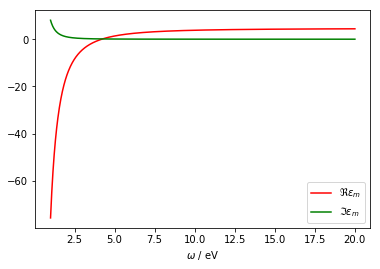

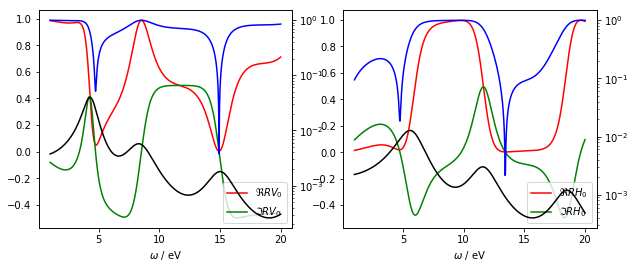

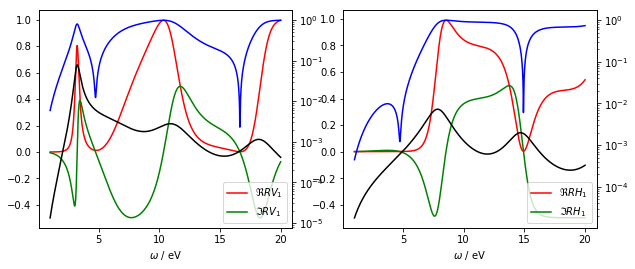

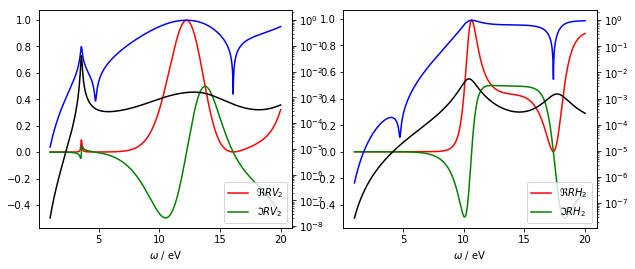

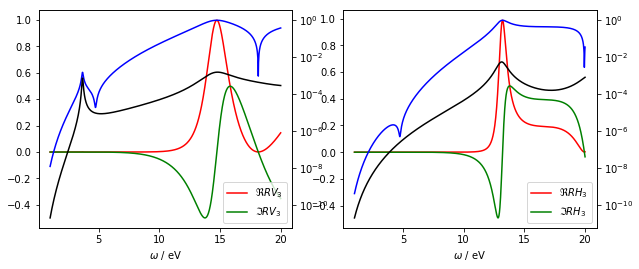

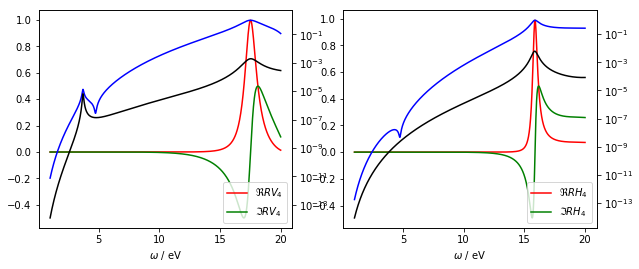

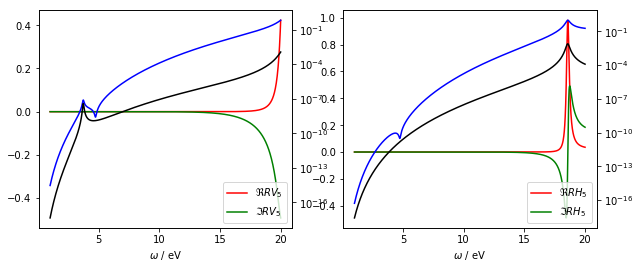

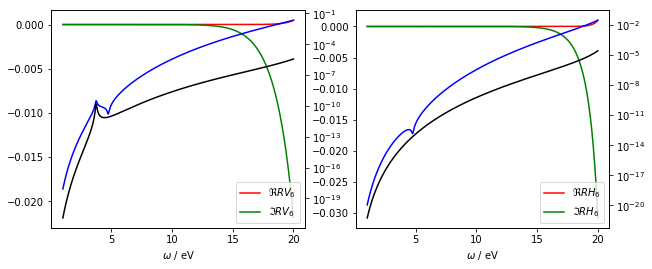

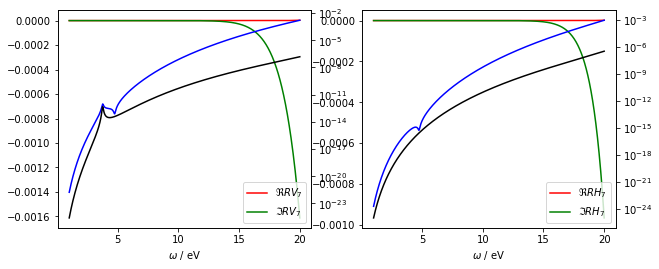

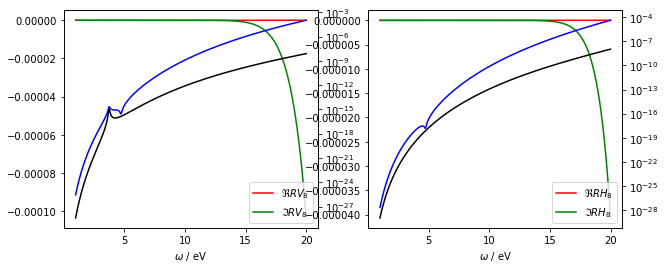

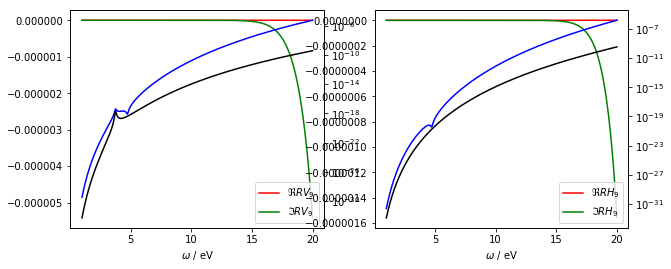

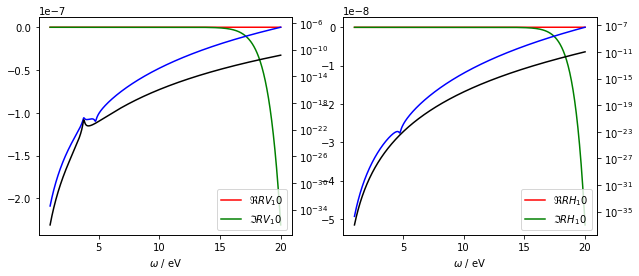

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

# N.B. the sign of the coefficients here are opposite to the convention used in scuff-tmatrix,
# hence the "energy generation matrix" is W = T* T / 2 - (T + T*) / 4 
# instead of W = T* T / 2 + (T + T*) / 4
# Test of Mie reflection coefficients
from qpms import *
startω =1*eV/ℏ
stopω = 20*eV/ℏ
ωlist = np.linspace(startω, stopω, 1000)

R = 40e-9
ω_p = 9*eV/ℏ #9*eV/ℏ
ε_inf = 4.6
γ_p = 0.1*eV/ℏ
ε_b = 1# 2.13
nmax = 10


from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('multipage.pdf')

ε_mlist = ε_drude(ε_inf, ω_p, γ_p, ωlist)
f, ax = plt.subplots()
ax.plot(ωlist/(eV/ℏ), (np.real(ε_mlist)), 'r-', 
         label="$\Re{} \epsilon_m$")
ax.plot(ωlist/(eV/ℏ), (np.imag(ε_mlist)), 'g-',
         label="$\Im{} \epsilon_m$")
ax.set_xlabel("$\omega$ / eV")
ax.legend(loc=4)
pp.savefig()

RVlist = np.empty((nmax+1,)+ωlist.shape,dtype=np.complex_)
RHlist = np.empty((nmax+1,)+ωlist.shape,dtype=np.complex_)

for i in range(len(ωlist)):
    ω=ωlist[i]
    k_i = cmath.sqrt(ε_mlist[i])*ω/c
    k_e = cmath.sqrt(ε_b)*ω/c
    RH, RV, TH, TV = mie_coefficients(a=R, nmax=nmax, k_i=k_i, k_e=k_e, J_ext=1, J_scat=3)
    RVlist[:,i] = RV
    RHlist[:,i] = RH


for n in range(nmax+1):
    f, ax = plt.subplots(1,2, figsize=(10,4))
    ax[0].plot(ωlist/(eV/ℏ), (np.real(RVlist[n])), 'r-', 
             label="$\Re{} RV_"+str(n)+"$")
    ax[0].plot(ωlist/(eV/ℏ), (np.imag(RVlist[n])), 'g-',
             label="$\Im{} RV_"+str(n)+"$")
    axx=ax[0].twinx()
    axx.plot(ωlist/(eV/ℏ), abs(RVlist[n]), 'b-', )
    axx.plot(ωlist/(eV/ℏ), -(RVlist[n]*RVlist[n].conjugate()/2-(RVlist[n]+RVlist[n].conjugate())/4), 'k-',
             label="$-WV_"+str(n)+"$")
    axx.set_yscale('log')
    ax[1].plot(ωlist/(eV/ℏ), (np.real(RHlist[n])), 'r-', 
             label="$\Re{} RH_"+str(n)+"$")
    ax[1].plot(ωlist/(eV/ℏ), (np.imag(RHlist[n])), 'g-',
             label="$\Im{} RH_"+str(n)+"$")
    axx=ax[1].twinx()
    axx.plot(ωlist/(eV/ℏ), abs(RHlist[n]), 'b-', )
    axx.plot(ωlist/(eV/ℏ), -(RHlist[n]*RHlist[n].conjugate()/2-(RHlist[n]+RHlist[n].conjugate())/4), 'k-',
             label="$-WH_"+str(n)+"$")
    axx.set_yscale('log')

    ax[0].set_xlabel("$\omega$ / eV")
    ax[1].set_xlabel("$\omega$ / eV")
    ax[0].legend(loc=4)
    ax[1].legend(loc=4)
    pp.savefig()


/u/46/necadam1/unix/.local/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


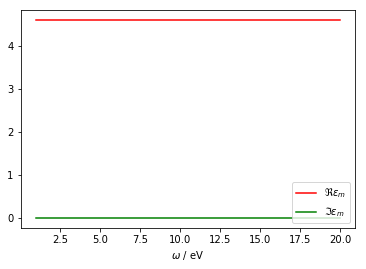

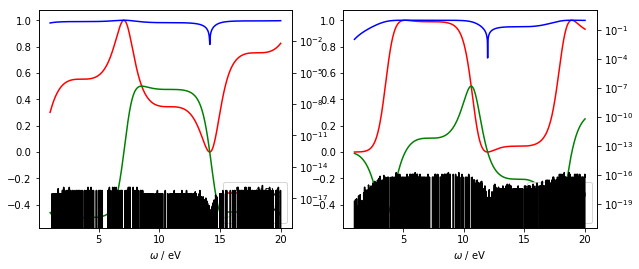

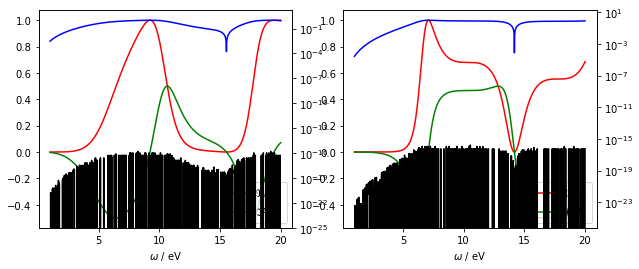

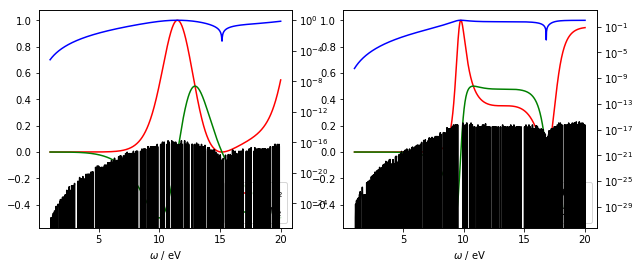

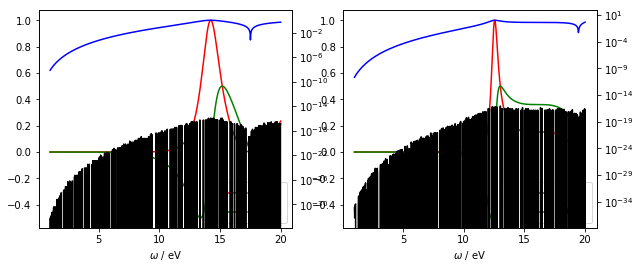

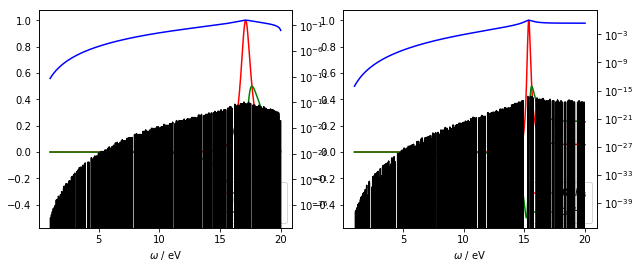

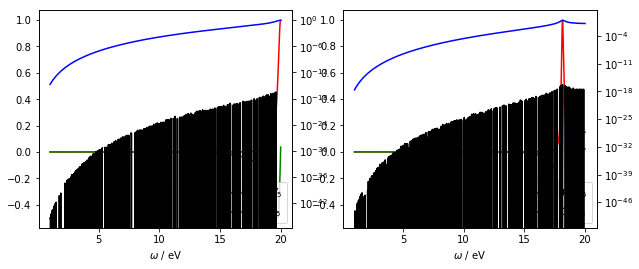

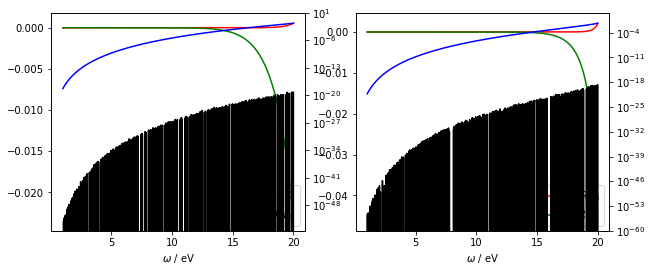

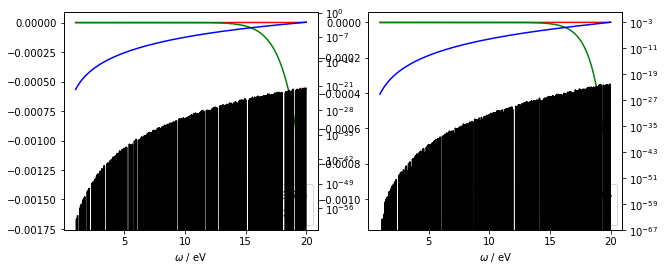

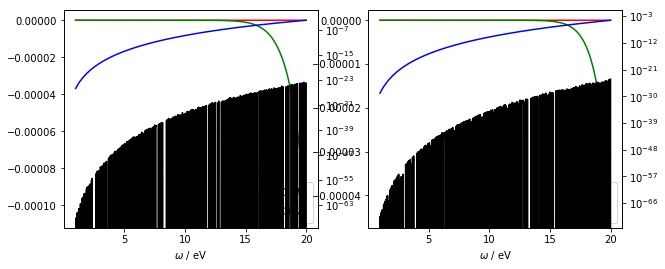

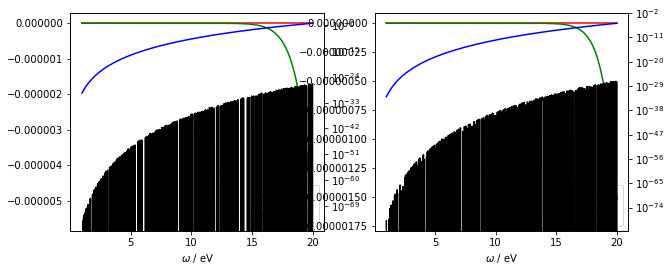

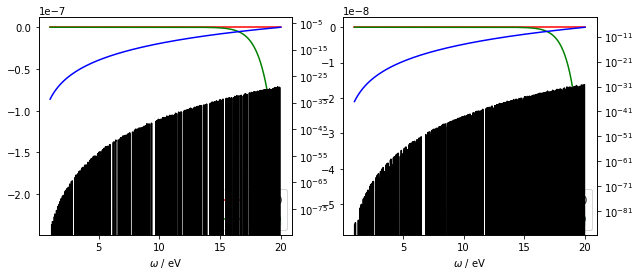

In [17]:

ε_const = 4.6



ε_mlist2 = np.full(ε_mlist.shape, ε_const)
f, ax = plt.subplots()
ax.plot(ωlist/(eV/ℏ), (np.real(ε_mlist2)), 'r-', 
         label="$\Re{} \epsilon_m$")
ax.plot(ωlist/(eV/ℏ), (np.imag(ε_mlist2)), 'g-',
         label="$\Im{} \epsilon_m$")
ax.set_xlabel("$\omega$ / eV")
ax.legend(loc=4)
pp.savefig()

RVlist = np.empty((nmax+1,)+ωlist.shape,dtype=np.complex_)
RHlist = np.empty((nmax+1,)+ωlist.shape,dtype=np.complex_)

for i in range(len(ωlist)):
    ω=ωlist[i]
    k_i = cmath.sqrt(ε_mlist2[i])*ω/c
    k_e = cmath.sqrt(ε_b)*ω/c
    RH, RV, TH, TV = mie_coefficients(a=R, nmax=nmax, k_i=k_i, k_e=k_e, J_ext=1, J_scat=3)
    RVlist[:,i] = RV
    RHlist[:,i] = RH


for n in range(nmax+1):
    f, ax = plt.subplots(1,2, figsize=(10,4))
    ax[0].plot(ωlist/(eV/ℏ), (np.real(RVlist[n])), 'r-', 
             label="$\Re{} RV_"+str(n)+"$")
    ax[0].plot(ωlist/(eV/ℏ), (np.imag(RVlist[n])), 'g-',
             label="$\Im{} RV_"+str(n)+"$")
    axx=ax[0].twinx()
    axx.plot(ωlist/(eV/ℏ), abs(RVlist[n]), 'b-', )
    axx.plot(ωlist/(eV/ℏ), -(RVlist[n]*RVlist[n].conjugate()/2-(RVlist[n]+RVlist[n].conjugate())/4), 'k-',
             label="$-WV_"+str(n)+"$")
    axx.set_yscale('log')
    ax[1].plot(ωlist/(eV/ℏ), (np.real(RHlist[n])), 'r-', 
             label="$\Re{} RH_"+str(n)+"$")
    ax[1].plot(ωlist/(eV/ℏ), (np.imag(RHlist[n])), 'g-',
             label="$\Im{} RH_"+str(n)+"$")
    axx=ax[1].twinx()
    axx.plot(ωlist/(eV/ℏ), abs(RHlist[n]), 'b-', )
    axx.plot(ωlist/(eV/ℏ), -(RHlist[n]*RHlist[n].conjugate()/2-(RHlist[n]+RHlist[n].conjugate())/4), 'k-',
             label="$-WH_"+str(n)+"$")
    axx.set_yscale('log')

    ax[0].set_xlabel("$\omega$ / eV")
    ax[1].set_xlabel("$\omega$ / eV")
    ax[0].legend(loc=4)
    ax[1].legend(loc=4)
    pp.savefig()


/u/46/necadam1/unix/.local/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


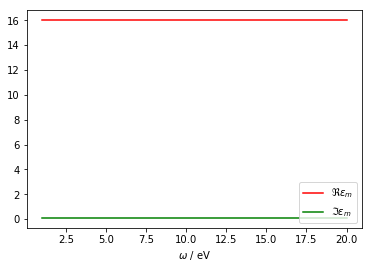

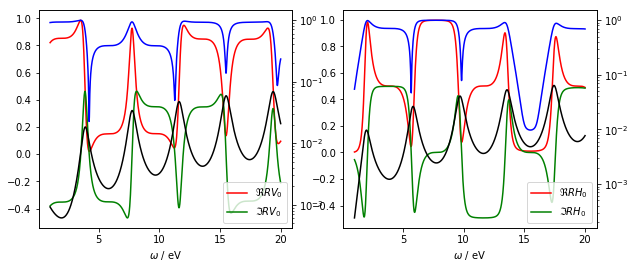

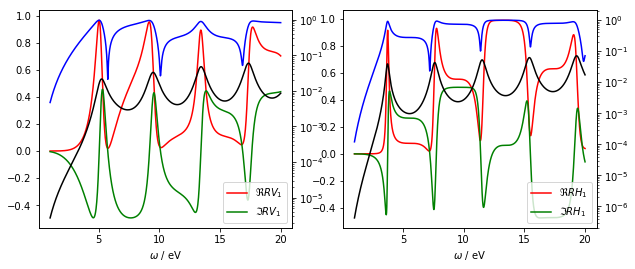

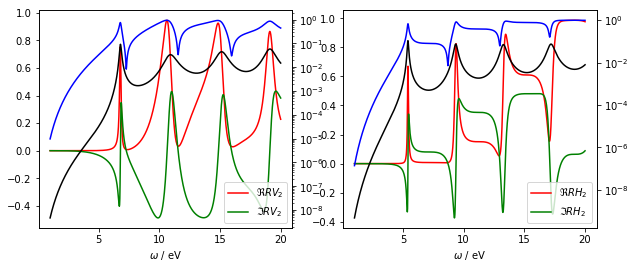

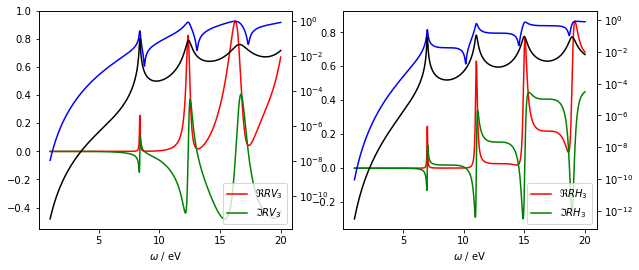

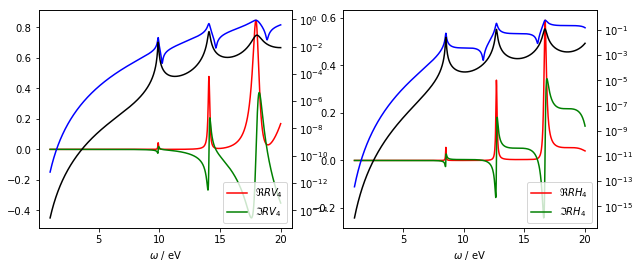

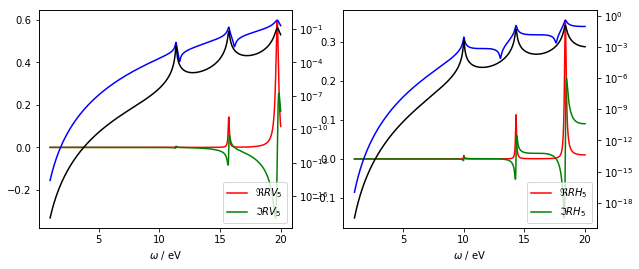

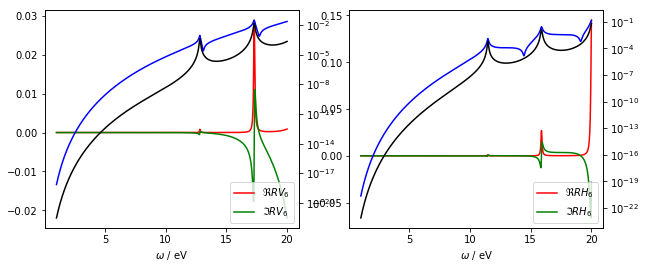

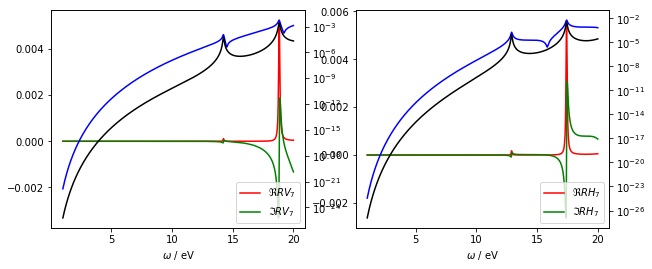

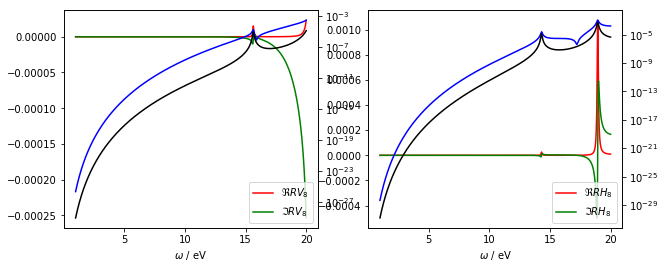

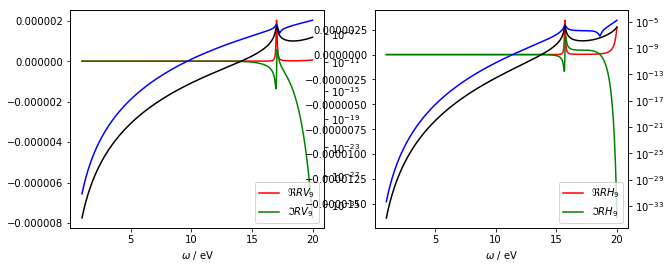

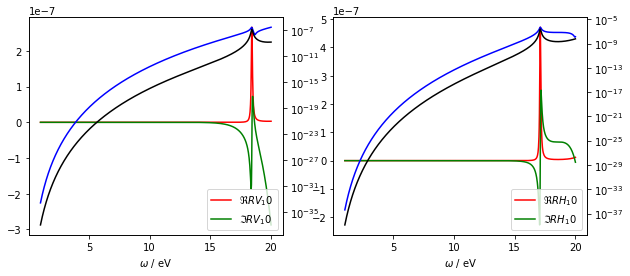

In [18]:

ε_const = 16. +0.1j



ε_mlist2 = np.full(ε_mlist.shape, ε_const)
f, ax = plt.subplots()
ax.plot(ωlist/(eV/ℏ), (np.real(ε_mlist2)), 'r-', 
         label="$\Re{} \epsilon_m$")
ax.plot(ωlist/(eV/ℏ), (np.imag(ε_mlist2)), 'g-',
         label="$\Im{} \epsilon_m$")
ax.set_xlabel("$\omega$ / eV")
ax.legend(loc=4)
pp.savefig()

RVlist = np.empty((nmax+1,)+ωlist.shape,dtype=np.complex_)
RHlist = np.empty((nmax+1,)+ωlist.shape,dtype=np.complex_)

for i in range(len(ωlist)):
    ω=ωlist[i]
    k_i = cmath.sqrt(ε_mlist2[i])*ω/c
    k_e = cmath.sqrt(ε_b)*ω/c
    RH, RV, TH, TV = mie_coefficients(a=R, nmax=nmax, k_i=k_i, k_e=k_e, J_ext=1, J_scat=3)
    RVlist[:,i] = RV
    RHlist[:,i] = RH

for n in range(nmax+1):
    f, ax = plt.subplots(1,2, figsize=(10,4))
    ax[0].plot(ωlist/(eV/ℏ), (np.real(RVlist[n])), 'r-', 
             label="$\Re{} RV_"+str(n)+"$")
    ax[0].plot(ωlist/(eV/ℏ), (np.imag(RVlist[n])), 'g-',
             label="$\Im{} RV_"+str(n)+"$")
    axx=ax[0].twinx()
    axx.plot(ωlist/(eV/ℏ), abs(RVlist[n]), 'b-', )
    axx.plot(ωlist/(eV/ℏ), -(RVlist[n]*RVlist[n].conjugate()/2-(RVlist[n]+RVlist[n].conjugate())/4), 'k-',
             label="$-WV_"+str(n)+"$")
    axx.set_yscale('log')
    ax[1].plot(ωlist/(eV/ℏ), (np.real(RHlist[n])), 'r-', 
             label="$\Re{} RH_"+str(n)+"$")
    ax[1].plot(ωlist/(eV/ℏ), (np.imag(RHlist[n])), 'g-',
             label="$\Im{} RH_"+str(n)+"$")
    axx=ax[1].twinx()
    axx.plot(ωlist/(eV/ℏ), abs(RHlist[n]), 'b-', )
    axx.plot(ωlist/(eV/ℏ), -(RHlist[n]*RHlist[n].conjugate()/2-(RHlist[n]+RHlist[n].conjugate())/4), 'k-',
             label="$-WH_"+str(n)+"$")
    axx.set_yscale('log')

    ax[0].set_xlabel("$\omega$ / eV")
    ax[1].set_xlabel("$\omega$ / eV")
    ax[0].legend(loc=4)
    ax[1].legend(loc=4)
    pp.savefig()

pp.close()